# Part 1: Pandas Basics

1 Load the CSV file into a Pandas DataFrame.

2 Display the first and last 5 rows of the dataset.

3 Check the data types of each column.

4 Find the number of rows and columns in the dataset.

5 Calculate the average sales and average profit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data_300_rows.csv')
print(df.head(5))

         date region product  sales  profit  quantity  customer_rating
0  2023-01-01   East       A    414     109         2              4.6
1  2023-01-02   West       A    421     122        13              3.1
2  2023-01-03  North       C    399      10        14              4.2
3  2023-01-04   East       B     96      -4        19              4.9
4  2023-01-05   East       B    404      98         7              4.4


In [3]:
df.describe()

,sales,profit,quantity,customer_rating
count,300.000000,300.000000,300.000000,300.000000
mean,275.636667,72.286667,9.690000,3.096000
std,128.278144,72.916027,5.532564,1.190199
min,50.000000,-50.000000,1.000000,1.000000
25%,170.500000,5.750000,5.000000,2.100000
50%,270.500000,69.000000,9.000000,3.100000
75%,392.000000,140.000000,14.250000,4.200000
max,496.000000,199.000000,19.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             300 non-null    object 
 1   region           300 non-null    object 
 2   product          300 non-null    object 
 3   sales            300 non-null    int64  
 4   profit           300 non-null    int64  
 5   quantity         300 non-null    int64  
 6   customer_rating  300 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 16.5+ KB


In [5]:
df.shape

(300, 7)

In [6]:
df.dtypes


date                object
region              object
product             object
sales                int64
profit               int64
quantity             int64
customer_rating    float64
dtype: object

In [7]:
df[['sales', 'profit']].mean()


sales     275.636667
profit     72.286667
dtype: float64

# Data Manipulation (Pandas & NumPy)

1 Find the total sales and total profit for each region.

2 Find the average customer rating per product.

3 Add a new column called 'profit_margin' = profit / sales.

4 Filter all rows where sales are greater than the overall average sales.

5 Using NumPy, compute the median and standard deviation of sales.

In [8]:
df[['sales', 'profit']].sum()
df.groupby('region')[['sales', 'profit']].sum()

,sales,profit
region,,
East,20001,5716
North,20719,5188
South,19178,4296
West,22793,6486


In [9]:
df.groupby('product')['customer_rating'].mean()

product
A    3.142647
B    3.002817
C    3.257971
D    3.011957
Name: customer_rating, dtype: float64

In [10]:
df['profit_margin'] = df['profit'] / df['sales']

In [11]:
average_sales = df['sales'].mean()
df[df['sales'] > average_sales]

,date,region,product,sales,profit,quantity,customer_rating,profit_margin
0,2023-01-01,East,A,414,109,2,4.6,0.263285
1,2023-01-02,West,A,421,122,13,3.1,0.289786
2,2023-01-03,North,C,399,10,14,4.2,0.025063
4,2023-01-05,East,B,404,98,7,4.4,0.242574
5,2023-01-06,West,A,360,29,3,4.5,0.080556
...,...,...,...,...,...,...,...,...
290,2023-10-18,North,A,418,-4,18,4.3,-0.009569
291,2023-10-19,East,D,458,76,6,1.9,0.165939
292,2023-10-20,North,A,361,5,19,4.6,0.013850
293,2023-10-21,South,D,466,163,4,1.0,0.349785


In [12]:
print(np.median(df['sales']))
print(np.std(df['sales']))

270.5
128.06416876793534


# Data Visualization (Matplotlib)

1 Create a line plot showing sales over time.

2 Create a bar chart showing total sales per region.

3 Create a histogram of the sales distribution.

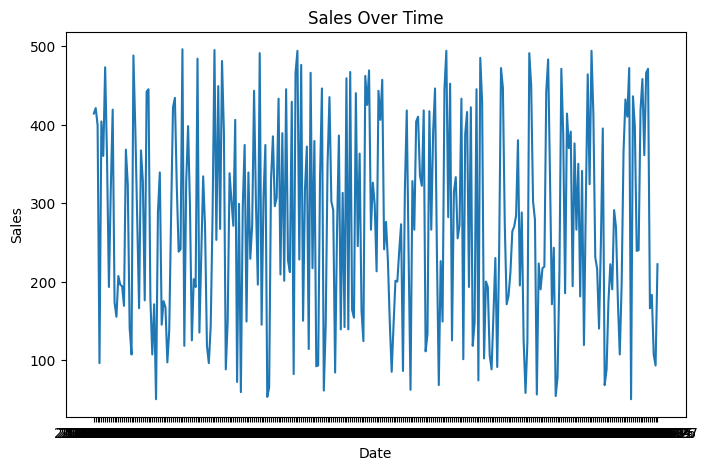

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(df['date'], df['sales'])
plt.title("Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


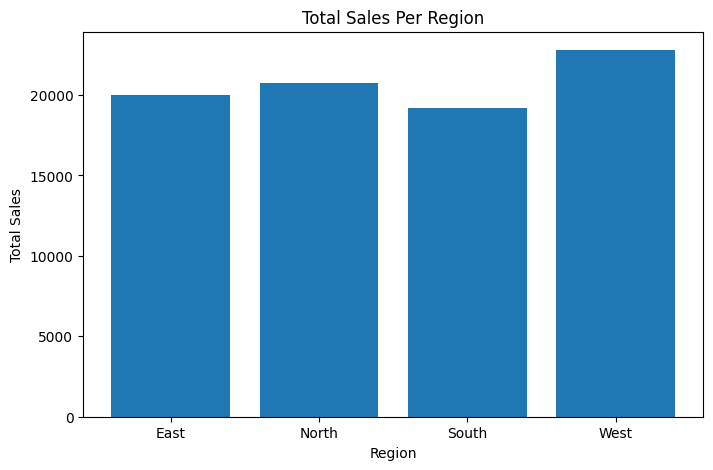

In [14]:
total_sales = df.groupby('region')['sales'].sum()

plt.figure(figsize=(8,5))
plt.bar(total_sales.index, total_sales.values)
plt.title("Total Sales Per Region")
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

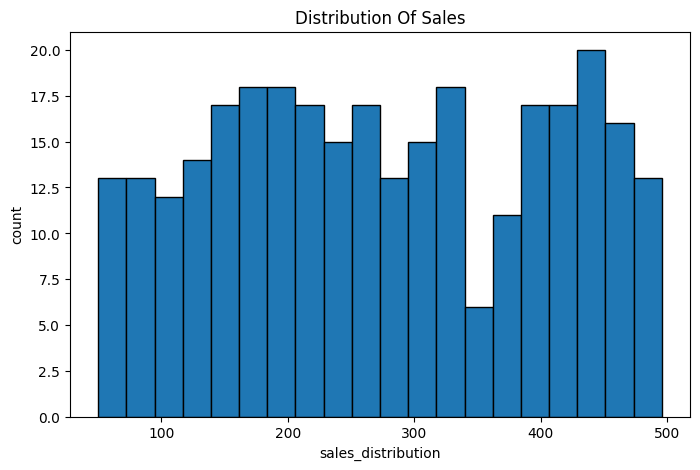

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df['sales'], bins=20, edgecolor='black')
plt.title('Distribution Of Sales')
plt.xlabel('sales_distribution')
plt.ylabel('count')
plt.show()

# Data Visualization (Seaborn)
1 Create a boxplot of sales by region.

2 Create a scatter plot of sales vs profit, colored by product.

3 Create a heatmap showing correlation between numerical variables.

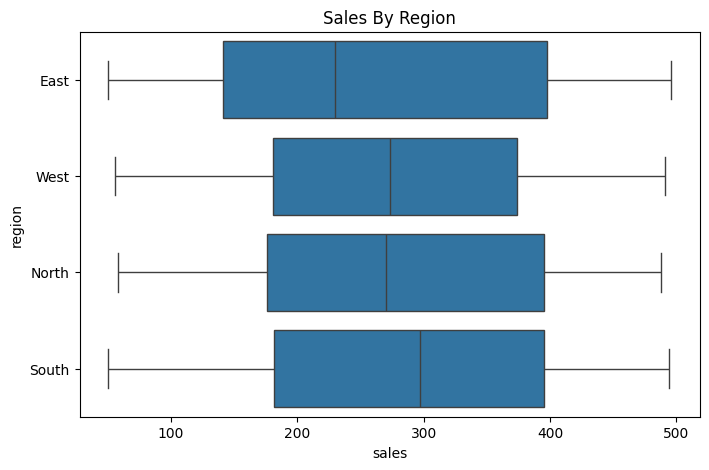

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'sales', y = 'region')
plt.title("Sales By Region")
plt.xlabel('sales')
plt.ylabel('region')
plt.show()

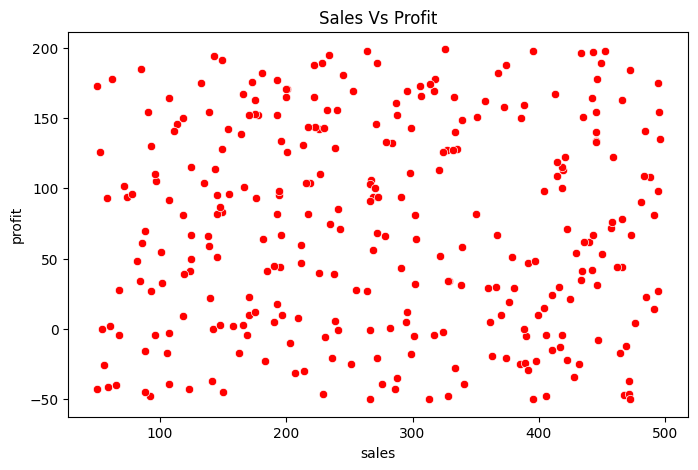

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x = 'sales', y = 'profit', color = 'red')
plt.title("Sales Vs Profit")
plt.xlabel('sales')
plt.ylabel('profit')
plt.show()

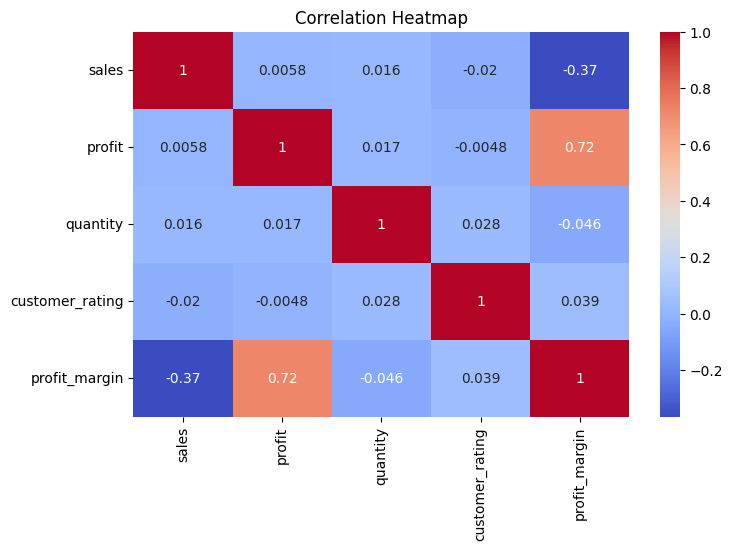

In [18]:
plt.figure(figsize=(8,5))
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 1 Resample the data by month and compute monthly total sales.

# 2 Identify the top 5 days with the highest profit.

# 3 Create a Seaborn pairplot for numerical columns.

In [19]:
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

monthly_sales = df['sales'].resample('M').sum()

monthly_sales


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16724\942753279.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['sales'].resample('M').sum()


date
2023-01-31    9151
2023-02-28    6962
2023-03-31    8465
2023-04-30    8606
2023-05-31    8869
2023-06-30    8256
2023-07-31    8437
2023-08-31    8141
2023-09-30    8191
2023-10-31    7613
Freq: ME, Name: sales, dtype: int64

In [22]:
top5_profit = df.sort_values('profit', ascending=False).head(5)
top5_profit


,region,product,sales,profit,quantity,customer_rating,profit_margin
date,,,,,,,
2023-05-29,North,C,326,199,15,1.5,0.610429
2023-07-09,South,A,452,198,5,2.1,0.438053
2023-08-11,South,B,264,198,4,1.5,0.750000
2023-09-28,South,B,395,198,8,3.6,0.501266
2023-03-27,East,D,443,197,14,2.7,0.444695


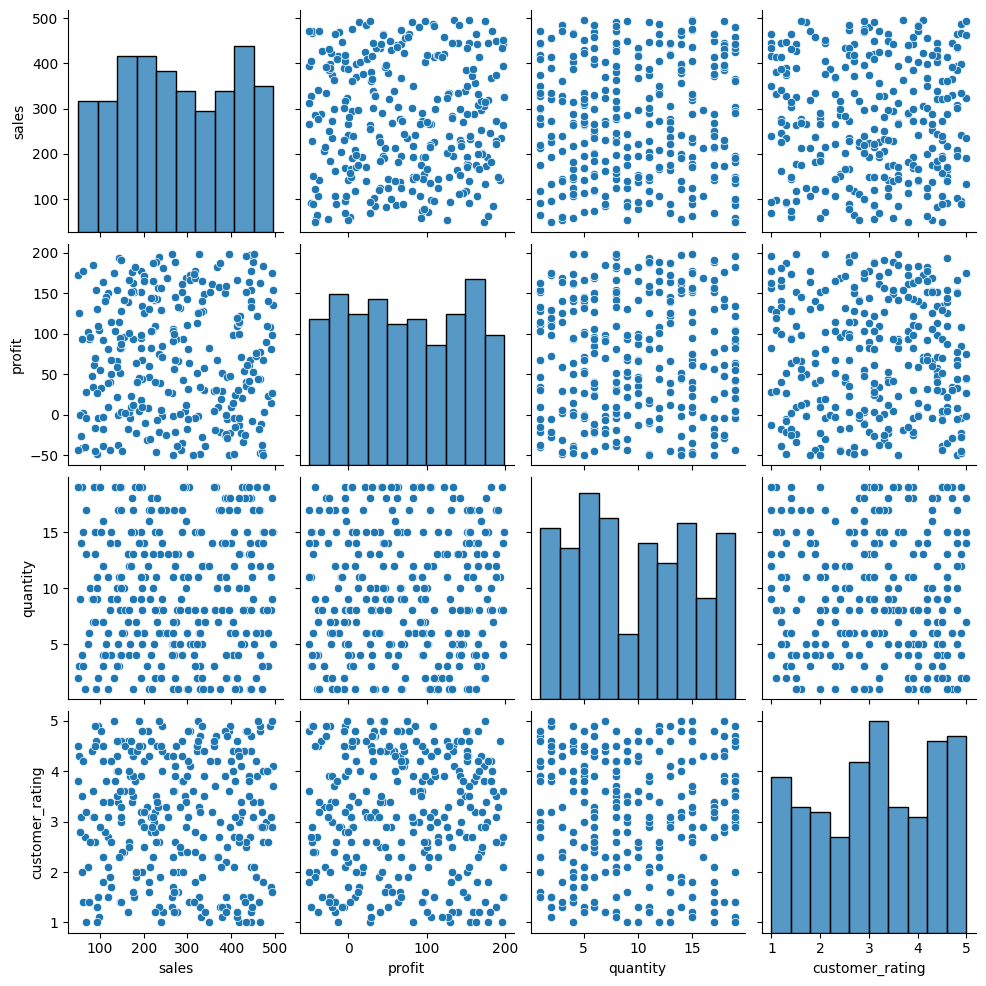

In [23]:

# Select only numerical columns
numerical_cols = ['sales', 'profit', 'quantity', 'customer_rating']

sns.pairplot(df[numerical_cols])
plt.show()
